# Logistic Regression Model to Predict Running Injuries 

### Table of Contents

1. [Reading in and Spliting the data](#Reading-in-and-Spliting-the-data)
2. [Initial Untuned Logistic Regression](#Initial-Untuned-Logistic-Regression)
3. [Optimizing Logistic Regression Hyperparameters](#Optimizing-Logistic-Regression-Hyperparameters)
4. [Upsampling Injuries to .5 of Non-injury Class](#Upsampling-Injuries-to-.5-of-Non-injury-Class)
5. [Upsample attempt to 50-50 split of injury vs non-injury](#Upsample-attempt-to-50-50-split-of-injury-vs-non-injury)
6. [Down Sampling Non-Injuries to 1/2](#Down-Sampling-Non-Injuries-to-1/2)
7. [Down sampling to 2x the size of Injury class](#Down-sampling-to-2x-the-size-of-Injury-class)
8. [Down sampling to 50/50 split](#Down-sampling-to-50/50-split)
9. [Conclusion](#Conclusion)

In this note book we will try to optimize a logistic regression models to predict running injuries. A logistic regression was chose as this is a binary classification problem and this model would also allow us to look at coefficients to better understand the effect of certain features on the likely hood of an athelte getting inured

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm


# Reading in and Spliting the data

In [2]:
#READING IN THE DATA
running_df=pd.read_csv('running_df_cleaned.csv', index_col=0)


In [3]:
#sanity check
running_df.shape

(42766, 73)

In [4]:
running_df

,nr. sessions,total km,km Z3-4,km Z5-T1-T2,km sprinting,strength training,hours alternative,perceived exertion,perceived trainingSuccess,perceived recovery,...,km Z5-T1-T2.6,km sprinting.6,strength training.6,hours alternative.6,perceived exertion.6,perceived trainingSuccess.6,perceived recovery.6,Athlete ID,injury,Date
0,1.0,5.8,0.0,0.6,1.2,0.0,0.00,0.11,0.00,0.18,...,0.0,0.0,0.0,1.0,0.10,0.00,0.15,0,0,0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.00,-0.01,-0.01,-0.01,...,0.5,1.2,0.0,0.0,0.10,0.00,0.17,0,0,1
2,1.0,0.0,0.0,0.0,0.0,1.0,0.00,0.10,0.00,0.17,...,0.0,0.0,0.0,0.0,-0.01,-0.01,-0.01,0,0,2
3,0.0,0.0,0.0,0.0,0.0,0.0,0.00,-0.01,-0.01,-0.01,...,0.0,0.0,1.0,0.0,0.10,0.00,0.17,0,0,3
4,1.0,0.0,0.0,0.0,0.0,0.0,1.08,0.08,0.00,0.18,...,0.0,0.0,0.0,0.0,0.11,0.00,0.17,0,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42761,1.0,16.0,0.0,0.0,0.0,0.0,0.00,0.54,0.22,0.30,...,0.0,0.0,0.0,0.0,-0.01,-0.01,-0.01,71,1,2143
42762,0.0,0.0,0.0,0.0,0.0,0.0,0.00,-0.01,-0.01,-0.01,...,0.0,0.0,0.0,0.0,-0.01,-0.01,-0.01,71,1,2286
42763,1.0,10.0,0.0,0.0,0.0,0.0,0.00,0.94,0.88,0.11,...,0.0,0.0,0.0,0.0,-0.01,-0.01,-0.01,71,1,2483
42764,1.0,15.1,0.0,0.0,0.0,0.0,0.00,0.87,0.86,0.20,...,0.0,0.0,0.0,0.0,0.79,0.80,0.11,71,1,2647


In [5]:
#sanity check
running_df.describe()

,nr. sessions,total km,km Z3-4,km Z5-T1-T2,km sprinting,strength training,hours alternative,perceived exertion,perceived trainingSuccess,perceived recovery,...,km Z5-T1-T2.6,km sprinting.6,strength training.6,hours alternative.6,perceived exertion.6,perceived trainingSuccess.6,perceived recovery.6,Athlete ID,injury,Date
count,42766.000000,42766.000000,42766.000000,42766.000000,42766.000000,42766.000000,42766.000000,42766.000000,42766.000000,42766.000000,...,42766.000000,42766.000000,42766.000000,42766.000000,42766.000000,42766.000000,42766.000000,42766.000000,42766.000000,42766.000000
mean,0.829561,7.038187,0.691381,0.579930,0.073016,0.116237,0.163492,0.247788,0.349802,0.195898,...,0.580347,0.072595,0.116120,0.162308,0.247550,0.349503,0.196224,34.550858,0.013632,1228.039892
std,0.580696,7.473216,2.317657,1.811938,0.483480,0.326010,0.549664,0.257262,0.368300,0.190321,...,1.814538,0.483691,0.326016,0.554031,0.256718,0.368042,0.190568,19.050033,0.115960,807.021168
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.010000,-0.010000,-0.010000,...,0.000000,0.000000,0.000000,0.000000,-0.010000,-0.010000,-0.010000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.010000,-0.010000,-0.010000,...,0.000000,0.000000,0.000000,0.000000,-0.010000,-0.010000,-0.010000,20.000000,0.000000,436.000000
50%,1.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.160000,0.260000,0.160000,...,0.000000,0.000000,0.000000,0.000000,0.160000,0.260000,0.170000,34.000000,0.000000,1256.000000
75%,1.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.440000,0.720000,0.300000,...,0.000000,0.000000,0.000000,0.000000,0.440000,0.720000,0.300000,50.000000,0.000000,1913.000000
max,2.000000,55.900000,42.200000,48.000000,40.000000,2.000000,10.220000,1.000000,1.000000,1.000000,...,48.000000,40.000000,2.000000,20.000000,1.000000,1.000000,1.000000,73.000000,1.000000,2673.000000


Bellow we will split the data into train, validaiton and test, and will then see how an intuned logistic regression performs.

In [6]:
#splitting the data in train, validaiton and test

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X=running_df.drop(['injury'], axis= 1)
y=running_df['injury']


#split into test and remainder
X_remainder, X_test, y_remainder, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y )


In [7]:
#split remainder into train and validation
X_train, X_validation, y_train, y_validation = train_test_split(X_remainder, y_remainder, test_size=0.2, random_state=1, )


In [8]:
y_train.value_counts(normalize=True)

0    0.986627
1    0.013373
Name: injury, dtype: float64

In [9]:
y_validation.value_counts(normalize=True)

0    0.985387
1    0.014613
Name: injury, dtype: float64

In [10]:
y_test.value_counts(normalize=True)

0    0.986322
1    0.013678
Name: injury, dtype: float64

Note within the train test split we stratified the data so that the ratio of injury to non injury was consistant throughout. As we can see from the cells above, each y_(train, test, validation) roughly has 13-14% injured.

We will now fit a initial untuned logistic regression with the train data to get a base line of model performance before optimizing.

# Initial Untuned Logistic Regression

In [11]:
# INSTANTIATE*?* AND FIT MODEL
logreg_1= LogisticRegression(max_iter=10000)
logreg_1.fit(X_train, y_train)

#score
print(f'train score:{logreg_1.score(X_train,y_train)}')
print(f'validation score:{logreg_1.score(X_validation,y_validation)}')


train score:0.9866272059629508
validation score:0.9853865263773199


Our initial logistic regression with out scaling or any parameter optimization is already at 98% accuracy, however this accuracy should be taken with a grain of salt as our data set was already 98.6 non-injured (see bellow). We will plot a confusion matrix and check the f1 score to get a better look at the models accuracy. 

In [12]:
#percentage of non injury vs injury
running_df['injury'].value_counts(normalize= True)

0    0.986368
1    0.013632
Name: injury, dtype: float64

/Users/johnfitzpatrick/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


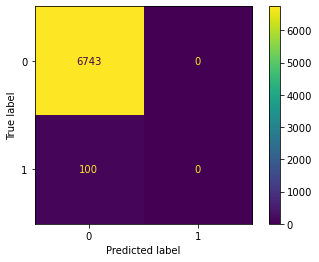

In [13]:
from sklearn.metrics import plot_confusion_matrix, confusion_matrix

plot_confusion_matrix(logreg_1, X_validation, y_validation);

In [14]:
from sklearn.metrics import plot_confusion_matrix, confusion_matrix

# Get class predictions
y_pred = logreg_1.predict(X_validation)

# Generate confusion matrix
cf_matrix = confusion_matrix(y_validation, y_pred)

# label rows and columns
cf_df = pd.DataFrame(
    cf_matrix, 
    columns=["Predicted Non-Injury", "Predicted Injury"],
    index=["True Non-Injury", "True Injury"]
)

display(cf_df)

,Predicted Non-Injury,Predicted Injury
True Non-Injury,6743,0
True Injury,100,0


As expected the model is simply classifying everything as non-injured.

In [15]:
from sklearn.metrics import classification_report

y_pred= logreg_1.predict(X_validation)

print(classification_report(y_validation, y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      6743
           1       0.00      0.00      0.00       100

    accuracy                           0.99      6843
   macro avg       0.49      0.50      0.50      6843
weighted avg       0.97      0.99      0.98      6843



/Users/johnfitzpatrick/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/johnfitzpatrick/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/johnfitzpatrick/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, le

The classification report further illustrates the models poor perfromance, with recall, percision and f1-scores of 0.

We will try to optimize or model's hyper parameters to see if we can improve upon this score.

# Optimizing Logistic Regression Hyperparameters

We will utilize gridsearch cross valdidation to find the best hyper parameters for our model.

In [16]:
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV



estimators = [('Scaler', StandardScaler()),
              ('Model', LogisticRegression())]

pipe = Pipeline(estimators)


In [17]:
from sklearn.metrics import f1_score
from sklearn.metrics import make_scorer
from sklearn.model_selection import RandomizedSearchCV


f1_micro= make_scorer(f1_score, average='micro')

param_grid = ([
    {
        'Scaler': [StandardScaler(), None],
        'Model': [LogisticRegression(max_iter=1000)],
        'Model__class_weight': ['balanced', {0:1, 1:800}, {0:1, 1:700},{0:1, 1:900},{0:1, 1:400},],
        'Model__C': [0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000], 
        #'Dimension_reducer__n_components': [1, 2, 3, 4, 5,6,7,8,9,10]
    }]
)

grid = RandomizedSearchCV(pipe, param_grid,scoring='f1_micro', cv=5, n_jobs=-1)

fittedgrid = grid.fit(X_train, y_train)

/Users/johnfitzpatrick/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/johnfitzpatrick/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/lin

/Users/johnfitzpatrick/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


* in this girdsearch PCA was not used for the sake of maintaining interpretability
* F1_micro was used as it accounts for the percsion and recall, and accounts for class imbalance. This is with the goal of selecting parameters that result in better f1 scores, opposed to using a grid search that scores wtih only accuracy, which we already saw (with our log reg scores of 98%), can yeild a high score but poor perfromance.

In [18]:
# Best hyperparameters
fittedgrid.best_params_

{'Scaler': None,
 'Model__class_weight': 'balanced',
 'Model__C': 0.01,
 'Model': LogisticRegression(C=0.01, class_weight='balanced', max_iter=1000)}

/Users/johnfitzpatrick/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


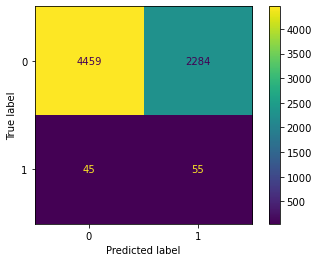

In [19]:
plot_confusion_matrix(fittedgrid.best_estimator_, X_validation, y_validation);

In [20]:
from sklearn.metrics import classification_report
y_pred=fittedgrid.predict(X_validation)

print(classification_report(y_validation, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.66      0.79      6743
           1       0.02      0.55      0.05       100

    accuracy                           0.66      6843
   macro avg       0.51      0.61      0.42      6843
weighted avg       0.98      0.66      0.78      6843



In [21]:

# Get class predictions
y_pred = fittedgrid.predict(X_validation)

# Generate confusion matrix
cf_matrix = confusion_matrix(y_validation, y_pred)

# label rows and columns
cf_df = pd.DataFrame(
    cf_matrix, 
    columns=["Predicted Non-Injury", "Predicted Injury"],
    index=["True Non-Injury", "True Injury"]
)

display(cf_df)

,Predicted Non-Injury,Predicted Injury
True Non-Injury,4459,2284
True Injury,45,55


We have raised our recall score to .48, however we have over 2000 false injuries, and 52 false-non-injuries, which results in a low f1-score of 0.04, and low percision of 0.02.

These low f1-scores, could be due to the highly imbalanced data set. We will try to correct this bellow by implementing up sampling of the injuries or down sampling of the non-injuries. 

#  Upsampling Injuries to .5 of Non-injury Class

In [22]:
# number of injuries
print('Number of injuries in training set:', X_train[y_train == 1].shape[0])

Number of injuries in training set: 366


There are currently 366 injuries in out training set

In [23]:
#resampling the data
from sklearn.utils import resample


X_upsampled, y_upsampled = resample(X_train[y_train == 1], 
                                    y_train[y_train == 1], 
                                    replace=True, 
                                    n_samples=X_train[y_train == 0].shape[0]//2,  # upsampling so we add half the number of majority to the minority
                                    random_state=123) 

print('Number of class 1 examples after:', X_upsampled.shape[0])

# Combine upsample with original data
X_train_US1 = np.vstack((X_train[y_train == 0], X_upsampled))
y_train_US1 = np.hstack((y_train[y_train == 0], y_upsampled))


Number of class 1 examples after: 13501


In [24]:
np.unique(y_train, return_counts= True)

(array([0, 1]), array([27003,   366]))

In [25]:
#Checking spread of each type
np.unique(y_train_US1, return_counts= True)

(array([0, 1]), array([27003, 13501]))

We can see that our new y_train has 13,501 injuries comparedd to the 27,000 non injured. We will conduct a gridsearch to optimize a logistic regression for this up sampled data set.

### Grid search

In [ ]:
param_grid = ([
    {
        'Scaler': [StandardScaler(), None],
        'Model': [LogisticRegression(max_iter=1000)],
        'Model__class_weight': ['balanced', {0:1, 1:1000},{0:1, 1:300},],
        'Model__C': [0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000],
    }]
)

grid = GridSearchCV(pipe, param_grid,scoring=f1_micro, cv=5, n_jobs=-1) 

fittedgrid_US1 = grid.fit(X_train_US1, y_train_US1)

/Users/johnfitzpatrick/opt/anaconda3/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/Users/johnfitzpatrick/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/johnfitzpatrick/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS 

/Users/johnfitzpatrick/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/johnfitzpatrick/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/lin

/Users/johnfitzpatrick/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/johnfitzpatrick/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/lin

In [ ]:
# Best hyperparameters
fittedgrid_US1.best_params_

In [ ]:
plot_confusion_matrix(fittedgrid_US1.best_estimator_, X_validation, y_validation)

In [ ]:
y_pred_US1=fittedgrid_US1.predict(X_validation)

print(classification_report(y_validation, y_pred_US1))

There appears to virtually be no change in scores, so we will upsample the injury further so that there equivalent amounts of injury to non-injury.

# Upsample attempt to 50-50 split of injury vs non-injury


In [ ]:
#checking the number of non-injured vs injured, to set our resample accordingly
np.unique(y_train, return_counts= True)

In [ ]:
#upsampling to 50-50 split
X_upsampled2, y_upsampled2 = resample(X_train[y_train == 1], # injury features
                                    y_train[y_train == 1], # inj labels
                                    replace=True, 
                                    n_samples=27003,
                                    random_state=123)

print('Number of class 1 examples after:', X_upsampled2.shape[0])

# Combine upsample with original data
X_train_US2 = np.vstack((X_train[y_train == 0], X_upsampled2)) # same as concat with axis=0
y_train_US2 = np.hstack((y_train[y_train == 0], y_upsampled2))



In [ ]:
#refitting gridsearch
param_grid = ([
    {
        'Scaler': [StandardScaler(), None],
        'Model': [LogisticRegression(max_iter= 1000)],
        'Model__class_weight': ['balanced', {0:1, 1:1000},{0:1, 1:300},],
        'Model__C': [0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000],
    }]
)

grid = GridSearchCV(pipe, param_grid, scoring= f1_micro, cv=5, n_jobs=-1)

fittedgrid_US2= grid.fit(X_train_US2, y_train_US2)

In [ ]:
# Best hyperparameters
fittedgrid_US2.best_params_

In [ ]:
plot_confusion_matrix(fittedgrid_US2.best_estimator_, X_validation, y_validation)

In [ ]:
y_pred_US2=fittedgrid_US2.predict(X_validation)

print(classification_report(y_validation, y_pred_US2))

Again we see a a small but insignificant improvement. Next we will try down sampling the non-Injuries.

# Down Sampling Non-Injuries to 1/2 

In [ ]:
#checking the number of non-injured vs injured, to set our resample accordingly
np.unique(y_train, return_counts= True)

In [ ]:
27003/2

In [ ]:
#Down sampling non-inj
X_downsampled, y_downsampled = resample(X_train[y_train == 0], 
                                    y_train[y_train == 0], 
                                    replace=True, 
                                    n_samples=13501,
                                    random_state=123)

print('Number of class 1 examples after:', X_downsampled.shape[0])

# Combine upsample with original data
X_train_DS1 = np.vstack((X_train[y_train == 1], X_downsampled)) 
y_train_DS1 = np.hstack((y_train[y_train == 1], y_downsampled))


In [ ]:
np.unique(y_train_DS1, return_counts= True)

We will now run a grid search to optimize logistic regression hyper parameters for this data set

In [ ]:
param_grid = ([
    {
        'Scaler': [StandardScaler(), None],
        'Model': [LogisticRegression(max_iter= 1000)],
        'Model__class_weight': ['balanced', {0:1, 1:1000},{0:1, 1:300},],
        'Model__C': [0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10],
    }]
)

grid = GridSearchCV(pipe, param_grid, scoring= f1_micro, cv=5, n_jobs=-1)

fittedgrid_DS1= grid.fit(X_train_DS1, y_train_DS1)

In [ ]:
# Best hyperparameters
fittedgrid_DS1.best_params_

In [ ]:
plot_confusion_matrix(fittedgrid_DS1.best_estimator_, X_validation, y_validation)

In [ ]:
y_pred_DS1=fittedgrid_DS1.predict(X_validation)

print(classification_report(y_validation, y_pred_DS1))

Again, we see marginal improvement but still not significatn enough.
This time we will down sample the data to 2x the size of the injury class

# Down sampling to 2x the size of Injury class

In [ ]:
#checking the number of non-injured vs injured, to set our resample accordingly
np.unique(y_train, return_counts= True)

In [ ]:
366*2

In [ ]:
#Down sampling non-inj
X_downsampled, y_downsampled = resample(X_train[y_train == 0], 
                                    y_train[y_train == 0], 
                                    replace=True, 
                                    n_samples=732,
                                    random_state=123)

print('Number of class 1 examples after:', X_downsampled.shape[0])

# Combine upsample with original data
X_train_DS2 = np.vstack((X_train[y_train == 1], X_downsampled)) 
y_train_DS2 = np.hstack((y_train[y_train == 1], y_downsampled))


In [ ]:
np.unique(y_train_DS2, return_counts= True)

We will now run a grid search to optimize logistic regression hyper parameters for this data set

In [ ]:
param_grid = ([
    {
        'Scaler': [StandardScaler(), None],
        'Model': [LogisticRegression(max_iter= 1000)],
        'Model__class_weight': ['balanced', {0:1, 1:1000},{0:1, 1:300},],
        'Model__C': [0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10],
    }]
)

grid = GridSearchCV(pipe, param_grid, scoring= f1_micro, cv=5, n_jobs=-1)

fittedgrid_DS2= grid.fit(X_train_DS2, y_train_DS2)

In [ ]:
# Best hyperparameters
fittedgrid_DS2.best_params_

In [ ]:
plot_confusion_matrix(fittedgrid_DS2.best_estimator_, X_validation, y_validation)

In [ ]:
y_pred_DS2=fittedgrid_DS2.predict(X_validation)

print(classification_report(y_validation, y_pred_DS2))

Unfortunately, as before we still only see minimal improvements in the recall but the f1 score and perceision are still the same. Our last attempt will be down sampling the non-injured calss to teh point where we have a 50/50 split in the injury class.

# Down sampling to 50/50 split

In [ ]:
#checking the number of non-injured vs injured, to set our resample accordingly
np.unique(y_train, return_counts= True)

In [ ]:
#Down sampling non-inj
X_downsampled, y_downsampled = resample(X_train[y_train == 0], 
                                    y_train[y_train == 0], 
                                    replace=True, 
                                    n_samples=366,
                                    random_state=123)

print('Number of class 1 examples after:', X_downsampled.shape[0])

# Combine upsample with original data
X_train_DS3 = np.vstack((X_train[y_train == 1], X_downsampled)) 
y_train_DS3 = np.hstack((y_train[y_train == 1], y_downsampled))


In [ ]:
np.unique(y_train_DS3, return_counts= True)

We will now run a grid search to optimize logistic regression hyper parameters for this data set

In [ ]:
param_grid = ([
    {
        'Scaler': [StandardScaler(), None],
        'Model': [LogisticRegression(max_iter= 1000)],
        'Model__class_weight': ['balanced', {0:1, 1:1000},{0:1, 1:300},],
        'Model__C': [0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10],
    }]
)

grid = GridSearchCV(pipe, param_grid, scoring= f1_micro, cv=5, n_jobs=-1)

fittedgrid_DS3= grid.fit(X_train_DS3, y_train_DS3)

In [ ]:
# Best hyperparameters
fittedgrid_DS3.best_params_

In [ ]:
plot_confusion_matrix(fittedgrid_DS3.best_estimator_, X_validation, y_validation)

In [ ]:
y_pred_DS2=fittedgrid_DS3.predict(X_validation)

print(classification_report(y_validation, y_pred_DS2))

Surpsiginly we actually see the recall get slightly worse. As such we will consider the 2nd down sample model our best performing logistic regression.

# Conclusion
Despite opotimizing hyper parameters, up sampling the injury class and even down sampling the non-injured class, we were still unable to get a sufficint model to predict injuries. With that said we will instead try a different model and see if we will have better results (see next note book `XGBoost-Predicting Running Injuries`).


Back to top [Logistic Regression Model to Predict Running Injuries](#Logistic-Regression-Model-to-Predict-Running-Injuries)
